# **Data Exploration**

### **Requirements**

1. pandas
2. matplotlib
3. seaborn

#### **Installing requirements**

In [2]:
pip install pandas matplotlib seaborn

  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp313-cp313-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp313-cp313-wi

###

### **Importing libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

## **Exploring the dataset**

#### **Renaming the columns**

In [6]:
df = pd.read_csv("../dataset/admission_chances.csv")

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
df.rename(columns={"Serial No.": "serial", "GRE Score": "gre", "TOEFL Score": "toefl", "University Rating": "rating"}, inplace=True)

In [14]:
df.head()

,serial,gre,toefl,rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
df.rename(columns={"SOP": "sop", "LOR": "lor", "CGPA": "cgpa", "Research": "research", "Chance of Admit": "chance"}, inplace=True)

In [16]:
df.head()

,serial,gre,toefl,rating,sop,lor,cgpa,research,chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


####

#### **Checking for NULL values**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   serial    400 non-null    int64  
 1   gre       400 non-null    int64  
 2   toefl     400 non-null    int64  
 3   rating    400 non-null    int64  
 4   sop       400 non-null    float64
 5   lor       400 non-null    float64
 6   cgpa      400 non-null    float64
 7   research  400 non-null    int64  
 8   chance    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [18]:
df.isnull().sum()

serial      0
gre         0
toefl       0
rating      0
sop         0
lor         0
cgpa        0
research    0
chance      0
dtype: int64

In [35]:
df["rating"].value_counts()

rating
3    133
2    107
4     74
5     60
1     26
Name: count, dtype: int64

####

## **Plotting the data**

### **Heatmap**

In [21]:
columns = ["gre", "toefl", "rating", "sop", "lor", "cgpa", "research", "chance"]

In [22]:
plt.figure(figsize=(10, 7))
columns_to_use = df[columns].corr()

<Figure size 1000x700 with 0 Axes>

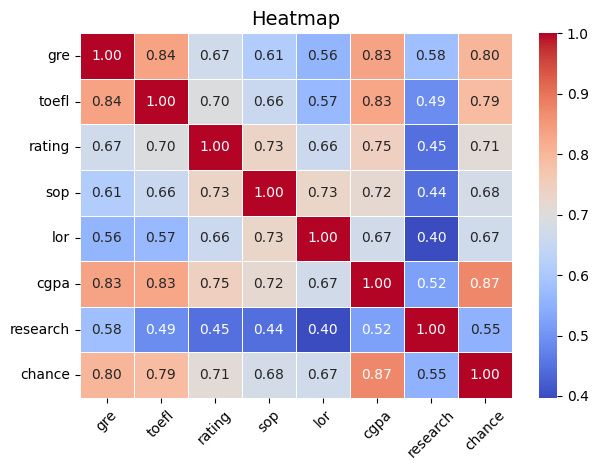

In [23]:
sns.heatmap(columns_to_use, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Looking at the heatmap, we can clearly see that academic score (GRE, TOEFL and CGPA) have the most affect on the chances of admission while the Research has moderately less affect.

####

### **Relation b/w Academic Score and Chance of Admission**

#### **CGPA vs. Chance of Admission**

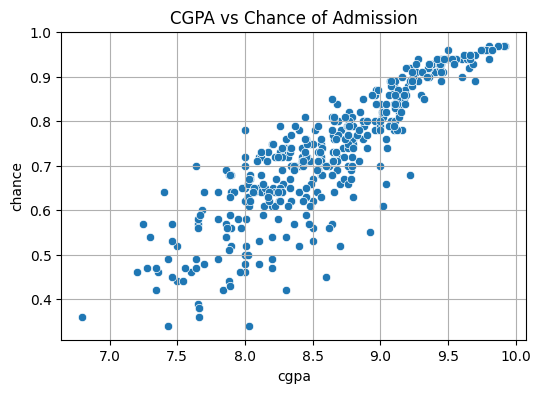

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="cgpa", y="chance", data=df)
plt.title("CGPA vs Chance of Admission")
plt.grid(True)
plt.show()

#####

#### **GRE Score vs. Chance of Admission**

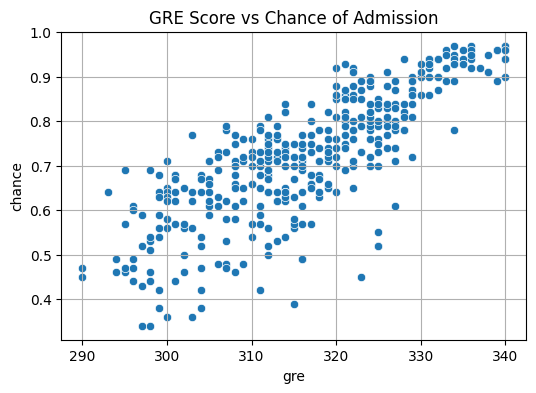

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="gre", y="chance", data=df)
plt.title("GRE Score vs Chance of Admission")
plt.grid(True)
plt.show()

#####

#### **TOEFL Score vs. Chance of Admission**

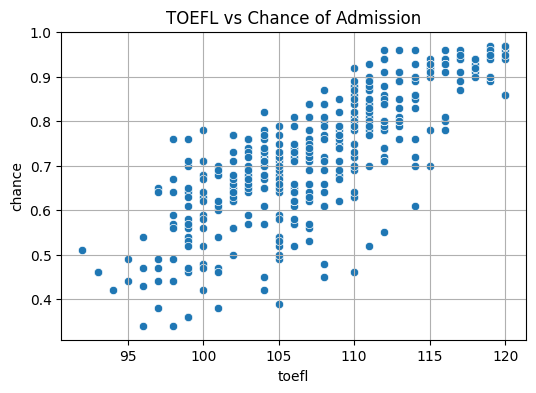

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="toefl", y="chance", data=df)
plt.title("TOEFL vs Chance of Admission")
plt.grid(True)
plt.show()

#####

Higher CGPA has most affect on the chances of admission.

Although important, GRE and TOEFL score have comparatively less affect.

#####

### **Relation b/w Research and Chance of Admission**

In [34]:
df["research"].value_counts()

research
1    219
0    181
Name: count, dtype: int64

######

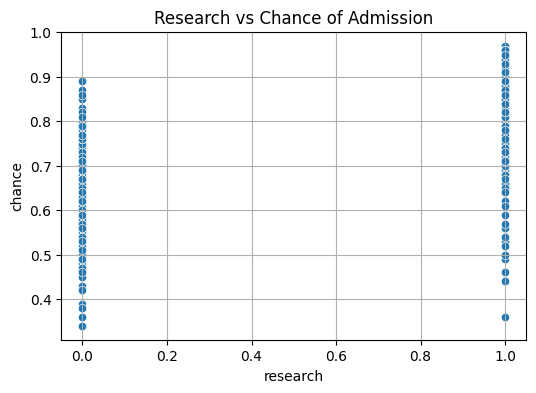

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="research", y="chance", data=df)
plt.title("Research vs Chance of Admission")
plt.grid(True)
plt.show()

Although very less, having research experience affects having more chances of admissions.

###

### **Saving the model**

In [36]:
 df.to_csv('../dataset/admission_chances.csv', index=False)